# **Importing the necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# **Data Preprocessing**

In [2]:
# loading data
df1 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
# concatenaing data alltogether in a single dataframe
df = pd.concat([df1, df2, df3, df4, df5], axis = 0)

# top 5 rows
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [4]:
# bottom 5 rows
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
169066,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months
169067,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,755000.0,62 years 10 months
169068,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,63 years 02 months
169069,2023-12,YISHUN,EXECUTIVE,834,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,785000.0,63 years 02 months
169070,2023-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,01 TO 03,179.0,Multi Generation,1987,975000.0,63 years 01 month


In [5]:
#  The dataset contains 915274 rows and 11 columns
df.shape

(915274, 11)

In [6]:
# Features(columns) in the dataset
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [7]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915274 entries, 0 to 169070
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                915274 non-null  object 
 1   town                 915274 non-null  object 
 2   flat_type            915274 non-null  object 
 3   block                915274 non-null  object 
 4   street_name          915274 non-null  object 
 5   storey_range         915274 non-null  object 
 6   floor_area_sqm       915274 non-null  float64
 7   flat_model           915274 non-null  object 
 8   lease_commence_date  915274 non-null  int64  
 9   resale_price         915274 non-null  float64
 10  remaining_lease      206224 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 83.8+ MB


## Checking for missing values

In [8]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [9]:
# dropping reamining_lease column as it contains more missing values
df.drop("remaining_lease", axis = 1, inplace = True)

In [10]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

## Checking for Duplicates

In [11]:
df[df.duplicated()]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
673,1990-01,GEYLANG,3 ROOM,47,CIRCUIT RD,01 TO 03,56.0,STANDARD,1969,18000.0
726,1990-01,HOUGANG,3 ROOM,308,HOUGANG AVE 5,10 TO 12,67.0,NEW GENERATION,1983,47000.0
843,1990-01,JURONG WEST,3 ROOM,145,HU CHING RD,04 TO 06,64.0,IMPROVED,1976,23400.0
854,1990-01,JURONG WEST,3 ROOM,172,BOON LAY DR,10 TO 12,70.0,IMPROVED,1974,32900.0
862,1990-01,JURONG WEST,3 ROOM,185,BOON LAY AVE,22 TO 24,59.0,IMPROVED,1975,22500.0
...,...,...,...,...,...,...,...,...,...,...
163166,2023-10,BUKIT BATOK,4 ROOM,461A,BT BATOK WEST AVE 8,10 TO 12,93.0,Model A,2019,660000.0
163601,2023-10,HOUGANG,3 ROOM,681,HOUGANG AVE 8,01 TO 03,64.0,Simplified,1989,370000.0
167966,2023-12,JURONG WEST,3 ROOM,180B,BOON LAY DR,07 TO 09,68.0,Model A,2014,430000.0
168154,2023-12,MARINE PARADE,4 ROOM,19,MARINE TER,04 TO 06,88.0,Improved,1975,505000.0


In [12]:
# There are 1959 duplicate rows in the data. so, we are gonna remove those rows
df.duplicated().sum()

1959

In [13]:
# Dropping Duplicates rows
df.drop_duplicates(inplace = True)

In [14]:
#  now, there are no Duplicates rows
df.duplicated().sum()

0

In [15]:
# after removing Duplicates rows , the dataset contains 913315 rows and 10 columns
df.shape

(913315, 10)

##  Checking Unique Values in Each Feature

In [16]:
for i in  df.columns:
    print(i, "----->", df[i].nunique())

month -----> 408
town -----> 27
flat_type -----> 8
block -----> 2699
street_name -----> 584
storey_range -----> 25
floor_area_sqm -----> 210
flat_model -----> 34
lease_commence_date -----> 56
resale_price -----> 9346


In [17]:
df["month"].unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [18]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [19]:
df["block"].unique()

array(['309', '216', '211', ..., '605B', '605A', '605C'], dtype=object)

In [20]:
df["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [21]:
df["flat_model"].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [22]:
df["floor_area_sqm"].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [23]:
df["lease_commence_date"].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020], dtype=int64)

In [24]:
df["storey_range"].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [25]:
df["street_name"].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [26]:
# After checking unique values in each feature , there are some issues in the values of flat_type and flat_model features.

In [27]:
# In Flat_type feature, replacing "MULTI-GENERATION" with "MULTI GENERATION"
df["flat_type"] = df["flat_type"].str.replace("MULTI-GENERATION", "MULTI GENERATION")

In [28]:
# after replacement
df["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [29]:
# The flat_model feature has same values in upper-case and lower-case format. so, converting all the values to upper-case format.
df["flat_model"] = df["flat_model"].str.upper()

In [30]:
# after doing the above step
df["flat_model"].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

<Axes: xlabel='resale_price', ylabel='Count'>

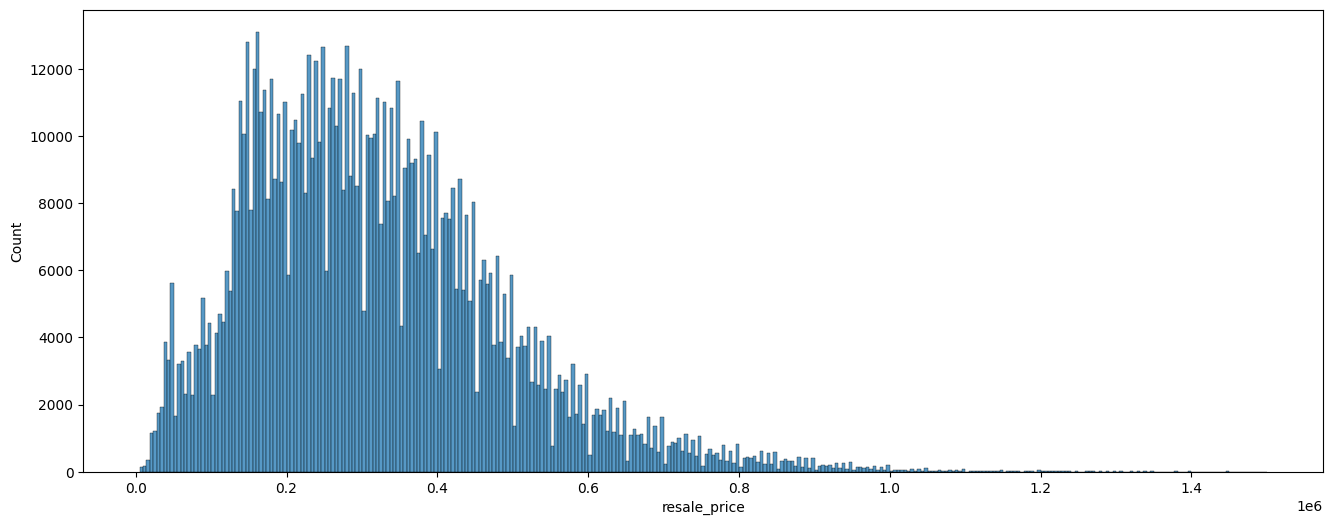

In [31]:
# Distribution of the Target feature(Resale_Price)
plt.figure(figsize = (16,6))
sns.histplot(df["resale_price"])

## Creating New Features

In [32]:
# splitting month feature into two(year and month)
df["year"] = df["month"].str.split("-").str[0]
df["month"] = df["month"].str.split("-").str[1]

In [33]:
# splitting storey_range feature into two(min_storey and max_storey)
df["min_storey"] = df["storey_range"].str.split("TO").str[0]
df["max_storey"] = df["storey_range"].str.split("TO").str[1]

In [34]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,min_storey,max_storey
0,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,10,12
1,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,04,06
2,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,10,12
3,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,07,09
4,01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,04,06


## Encoding Categorical Features

In [35]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["flat_type_encode"] = le.fit_transform(df["flat_type"])
df["flat_model_encode"] = le.fit_transform(df["flat_model"])
df["town_encode"] = le.fit_transform(df["town"])

In [36]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,min_storey,max_storey,flat_type_encode,flat_model_encode,town_encode
0,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,10,12,0,5,0
1,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,04,06,0,5,0
2,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,10,12,0,5,0
3,01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,07,09,0,5,0
4,01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,04,06,2,12,0


## Dealing with Data types

In [37]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
year                    object
min_storey              object
max_storey              object
flat_type_encode         int32
flat_model_encode        int32
town_encode              int32
dtype: object

In [38]:
# converting month, year, min_storey and max_storey features into int type
df["month"] = df["month"].astype(int)
df["year"] = df["year"].astype(int)
df["min_storey"] = df["min_storey"].astype(int)
df["max_storey"] = df["max_storey"].astype(int)

In [39]:
df.dtypes

month                    int32
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
year                     int32
min_storey               int32
max_storey               int32
flat_type_encode         int32
flat_model_encode        int32
town_encode              int32
dtype: object

## Correlation

In [40]:
cor = df.corr(numeric_only = True)
cor

,month,floor_area_sqm,lease_commence_date,resale_price,year,min_storey,max_storey,flat_type_encode,flat_model_encode,town_encode
month,1.000000,0.002773,0.016203,0.026024,-0.000727,0.000875,-0.001501,0.004065,-0.004573,0.004425
floor_area_sqm,0.002773,1.000000,0.394568,0.570507,0.064835,0.043541,0.043716,0.952822,-0.409973,0.133208
lease_commence_date,0.016203,0.394568,1.000000,0.534377,0.426077,0.168270,0.168711,0.416881,-0.203935,0.214642
resale_price,0.026024,0.570507,0.534377,1.000000,0.666473,0.245705,0.248261,0.596108,-0.261214,0.057336
year,-0.000727,0.064835,0.426077,0.666473,1.000000,0.106398,0.108457,0.103161,-0.061820,0.072269
min_storey,0.000875,0.043541,0.168270,0.245705,0.106398,1.000000,0.999357,0.078647,-0.076816,-0.049028
max_storey,-0.001501,0.043716,0.168711,0.248261,0.108457,0.999357,1.000000,0.078966,-0.076807,-0.048856
flat_type_encode,0.004065,0.952822,0.416881,0.596108,0.103161,0.078647,0.078966,1.000000,-0.370082,0.137316
flat_model_encode,-0.004573,-0.409973,-0.203935,-0.261214,-0.061820,-0.076816,-0.076807,-0.370082,1.000000,-0.117855
town_encode,0.004425,0.133208,0.214642,0.057336,0.072269,-0.049028,-0.048856,0.137316,-0.117855,1.000000


<Axes: >

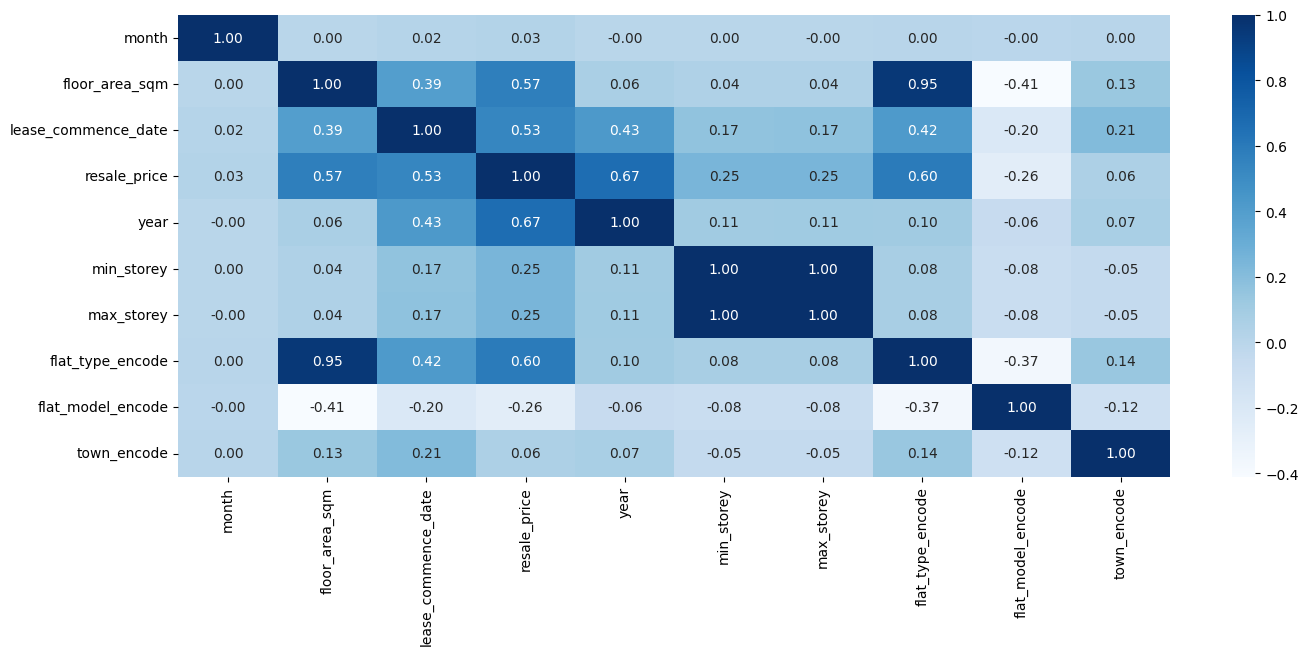

In [41]:
plt.figure(figsize = (16,6))
sns.heatmap(cor, annot = True, fmt = ".2f", cmap = "Blues")

In [42]:
# basic statistical measures for numerical features
df.describe()

,month,floor_area_sqm,lease_commence_date,resale_price,year,min_storey,max_storey,flat_type_encode,flat_model_encode,town_encode
count,913315.000000,913315.000000,913315.000000,9.133150e+05,913315.000000,913315.000000,913315.000000,913315.000000,913315.000000,913315.000000
mean,6.595935,95.720143,1988.149622,3.173184e+05,2005.940227,6.669387,8.684348,3.014191,8.995923,13.643322
std,3.407619,25.846002,10.526026,1.673663e+05,9.154377,4.807357,4.807399,0.948615,3.866639,8.800583
min,1.000000,28.000000,1966.000000,5.000000e+03,1990.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,4.000000,73.000000,1981.000000,1.920000e+05,1998.000000,4.000000,6.000000,2.000000,5.000000,5.000000
50%,7.000000,93.000000,1986.000000,2.950000e+05,2005.000000,7.000000,9.000000,3.000000,8.000000,13.000000
75%,10.000000,113.000000,1996.000000,4.130000e+05,2013.000000,10.000000,12.000000,4.000000,12.000000,23.000000
max,12.000000,307.000000,2022.000000,1.500000e+06,2023.000000,49.000000,51.000000,6.000000,20.000000,26.000000


In [43]:
# Saving data to csv format
df.to_csv("Singapore Flat Resale Price.csv", index = False, encoding = "utf-8-sig" )

In [44]:
df = pd.read_csv("Singapore Flat Resale Price.csv")
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,min_storey,max_storey,flat_type_encode,flat_model_encode,town_encode
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,10,12,0,5,0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,4,6,0,5,0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,10,12,0,5,0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,7,9,0,5,0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,4,6,2,12,0


# **ML Model Training**

In [45]:
# Input feature
X = df[["year", "month", "flat_type_encode", "flat_model_encode", "floor_area_sqm", "town_encode", "lease_commence_date", "min_storey", "max_storey"]]

# Output feature
Y = df["resale_price"]

In [46]:
# Train_test_split for model training and model evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [47]:
# Using Recursive Feature Elimination to know the importance of features which performs best in the test data 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

ss = StandardScaler()
S_X_train = ss.fit_transform(X_train)
S_X_test = ss.transform(X_test)

removal = list(range(9, 0, -1))
mses = []
c = 0
for num_features in removal:
    rfe = RFE(LinearRegression(), n_features_to_select = num_features)
    rfe.fit(S_X_train, Y_train)
    lr.fit(S_X_train[:,rfe.support_], Y_train)
    mses.append(mean_squared_error(Y_test, lr.predict(S_X_test[:, rfe.support_])))
    print('With',num_features, 'features, MSE:', mses[c])
    c = c + 1

With 9 features, MSE: 6720939055.734016
With 8 features, MSE: 6721465316.1026945
With 7 features, MSE: 6740745601.04843
With 6 features, MSE: 6846546250.80311
With 5 features, MSE: 6895441041.5928755
With 4 features, MSE: 7033571569.091811
With 3 features, MSE: 14714155899.396748
With 2 features, MSE: 26149245767.141487
With 1 features, MSE: 26268896058.75901


In [48]:
# by using recursive feature elimination, we came to know that using all the 9 features which gives minimum error.
#  so, we are using 9 features as input in the below linear regression model.

## Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
S_X_train = ss.fit_transform(X_train)
S_X_test = ss.transform(X_test)

lr.fit(S_X_train, Y_train)

pred_y_train = lr.predict(S_X_train)
pred_y_test = lr.predict(S_X_test)

from sklearn.metrics import mean_squared_error
print("Train MSE:", mean_squared_error(Y_train, pred_y_train))
print("Test MSE:", mean_squared_error(Y_test, pred_y_test))
print("\n")

from sklearn.metrics import r2_score
print("Train r2_score:", r2_score(Y_train, pred_y_train))
print("Test r2_score:", r2_score(Y_test, pred_y_test))

Train MSE: 6711574635.938888
Test MSE: 6720939055.734016


Train r2_score: 0.7605086432675652
Test r2_score: 0.7598068413754462


## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 20, min_samples_split = 5 , min_samples_leaf = 2)
dt.fit(X_train, Y_train)

pred_y_train = dt.predict(X_train)
pred_y_test = dt.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Train MSE:", mean_squared_error(Y_train, pred_y_train))          
print("Test MSE:", mean_squared_error(Y_test, pred_y_test))                    
print("\n")                                                                                             

from sklearn.metrics import r2_score
print("Train r2_score:", r2_score(Y_train, pred_y_train))
print("Test r2_score:", r2_score(Y_test, pred_y_test))

Train MSE: 575111610.9382927
Test MSE: 1004248958.6259648


Train r2_score: 0.9794781005282048
Test r2_score: 0.9641101150572112


## Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 30, min_samples_split = 8)  
rf.fit(X_train, Y_train)

pred_y_train = rf.predict(X_train)
pred_y_test = rf.predict(X_test)                                                              
                                                                                              
from sklearn.metrics import mean_squared_error
print("Train MSE:", mean_squared_error(Y_train, pred_y_train))        
print("Test MSE :", mean_squared_error(Y_test, pred_y_test))           
print("\n")
                                                                                                                        
from sklearn.metrics import r2_score                                                                        
print("Train r2_score:", r2_score(Y_train, pred_y_train))                                
print("Test r2_score :", r2_score(Y_test, pred_y_test))

Train MSE: 273515874.32606035
Test MSE : 618509844.6297743


Train r2_score: 0.9902400418108376
Test r2_score : 0.9778956732102397


In [52]:
rf.feature_importances_

array([0.51457444, 0.00677307, 0.050472  , 0.01292848, 0.28139665,
       0.06395577, 0.04481775, 0.01221928, 0.01286257])

## Saving the best model(Random Forest Model)

In [53]:
import pickle
with open("best_model.pkl","wb") as file:
  pickle.dump(rf, file, protocol=4)